In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns, pandas as pd

In [2]:
df=pd.read_csv('BoldvalaszKuldeni.csv')

In [3]:
df.columns

Index(['Sorszám', 'Neme?', 'Életkora', 'Városban lakik?',
       'A legmagasabb iskolai végzettsége', 'Hányan élnek egy háztartásban?',
       'Hogy érzi, mennyire boldog? A jelenlegi élethelyzetében a létra melyik fokán áll?',
       'Hogyan érzékeli a szakmai pályafutását? Jelenleg melyik fokon áll karrier szempontjából?',
       'Hogyan érzékeli az egészségi állapotát? Jelenleg  melyik fokon áll egészségileg?',
       'Milyeneknek érzi a baráti kapcsolatait? Jelenleg  melyik fokon áll az emberi kapcsolatokban?',
       'Milyennek érzékeli a természeti környezetet, amely körülveszi? Jelenleg  melyik fokon áll a környezetével kapcsolatokban?',
       'Megfelelő kikapcsolódási és szórakozási lehetőségei vannak? Jelenleg  melyik fokon áll a kikapcsolódás és szórakozás terén?',
       'Vallásos-e ön?',
       'Hogyan látja a jövőt? A boldogságát tekintve melyik fokon fog állni 5 év múlva?',
       'Hogyan érzékeli az anyagi helyzetét? Jelenleg  melyik fokon áll anyagilag?',
       'Milye

In [36]:
dc={'Sorszám':'ID', 
   'Neme?':'Nem', 
   'Életkora':'Életkor',
    'Városban lakik?':'Város',
   'A legmagasabb iskolai végzettsége':'Iskola', 
    'Hányan élnek egy háztartásban?':'Család mérete',
   'Hogy érzi, mennyire boldog? A jelenlegi élethelyzetében a létra melyik fokán áll?':'Boldogság',
   'Hogyan érzékeli a szakmai pályafutását? Jelenleg melyik fokon áll karrier szempontjából?':'Szakmai siker',
   'Hogyan érzékeli az egészségi állapotát? Jelenleg  melyik fokon áll egészségileg?':'Egészség',
   'Milyeneknek érzi a baráti kapcsolatait? Jelenleg  melyik fokon áll az emberi kapcsolatokban?':'Barátok',
   'Milyennek érzékeli a természeti környezetet, amely körülveszi? Jelenleg  melyik fokon áll a környezetével kapcsolatokban?':'Természet',
   'Megfelelő kikapcsolódási és szórakozási lehetőségei vannak? Jelenleg  melyik fokon áll a kikapcsolódás és szórakozás terén?':'Szórakozás',
   'Vallásos-e ön?':'Vallásosság',
   'Hogyan látja a jövőt? A boldogságát tekintve melyik fokon fog állni 5 év múlva?':'Boldogság 5 év múlva',
   'Hogyan érzékeli az anyagi helyzetét? Jelenleg  melyik fokon áll anyagilag?':'Anyagi helyzet',
   'Milyeneknek érzi a családi kapcsolatait? Jelenleg  melyik fokon áll a családi kapcsolatokban?':'Családi helyzet',
   'Egy főre jutó nettó jövedelem a háztartásban':'Jövedelem', 
    'Munkaviszonya':'Munkaviszony',
   'Végez hetente legalább 3-szor legkevesebb 30 perc testmozgást?':'Testmozgás',
   'Milyen lesz a természeti környezet, amely körülveszi? 5 év múlva melyik fokon fog állni a környezetével kapcsolatokban?':'Természet 5 év múlva',
   'Milyen a spiritualitással való kapcsolata? Jelenleg a létra melyik fokán áll a spiritualitás terén?':'Spiritualitás',
   'Ha bajba kerül vagy problémája adódik, van-e valaki a családjában vagy a közvetlen környezetében, akinek a segítségére vagy támogatására számíthat?':'Segítség',
   'Melyik székely szék településén van állandó lakhelye? (Az, ahol valóban lakik, nem az, amit a személyazonossági igazolványa ír.)':'Szék',
   'Szokott-e pénzzel vagy önkéntes munkával segíteni rászorulóknak, esetleg a rászorulókat támogató szervezeteknek? ':'Rászorulók',
   'Adományozott-e pénzt (bármilyen csekély összeget) az elmúlt hónapban?':'Adomány',
   'Leggyakrabban (nem a jelen pillanatban) milyen a kedélyállapota? Ha az előző szakaszban említett létrán 0 a mély depresszió és 10 a maximális eufória, akkor jelenleg a létra melyik fokán áll általános kedélyállapotát tekintve?':'Kedély',
   'Az ön közvetlen családjában (szülők, testvérek, házastárs, vagy gyermek) volt-e öngyilkossági kísérlet?':'Öngyilkosság családban',
   'Önnek, személy szerint volt-e öngyilkossági kísérlete?':'Öngyilkosság',
   'Úgy érzi, hogy van elég választási szabadsága, amikor fontos élethelyzetekben kell döntenie?':'Választási szabadság',
   'Korruptnak tartja-e a kormányzatot?':'Korrupt kormányzat',
   'Korruptnak tartja-e a székelyföldi politikusokat?':'Korrupt politikusok',
   'Korruptnak tartja-e a székelyföldi üzletembereket? A helyi gazdasági életben csak korrupcióval lehet érvényesülni?':'Korrupt üzletemberek'}

In [40]:
df=df[list(df.columns)[:-2]]

In [42]:
df.columns=[dc[i] for i in df.columns]

In [244]:
#0: igen nem, 1: categorical, 2: 1-10, jovo: 5 ev mulva
cats={'ID':1, 
    'Nem':0, 
    'Életkor':1, 
    'Város':0, 
    'Iskola':1, 
    'Család mérete':1, 
    'Boldogság':2,
    'Szakmai siker':2, 
    'Egészség':2, 
    'Barátok':2, 
    'Természet':2, 
    'Szórakozás':2,
    'Vallásosság':1, 
    'Boldogság 5 év múlva':3, 
    'Anyagi helyzet':2,
    'Családi helyzet':2, 
    'Jövedelem':1, 
    'Munkaviszony':1, 
    'Testmozgás':0,
    'Természet 5 év múlva':3, 
    'Spiritualitás':2, 
    'Segítség':0, 
    'Szék':1,
    'Rászorulók':1, 
    'Adomány':0, 
    'Kedély':2, 
    'Öngyilkosság családban':0,
    'Öngyilkosság':0, 
    'Választási szabadság':0, 
    'Korrupt kormányzat':0,
    'Korrupt politikusok':0, 
    'Korrupt üzletemberek':0}

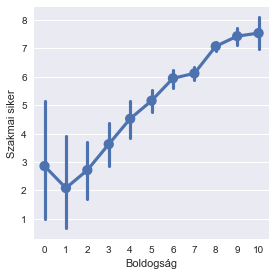

In [45]:
sns.factorplot(data=df, 
               x='Boldogság',
               y='Szakmai siker',  
       )

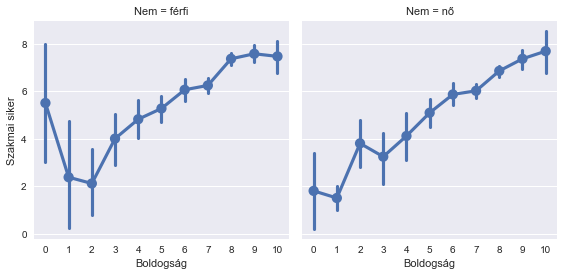

In [48]:
sns.factorplot(data=df, 
               x='Boldogság',
               y='Szakmai siker',  
               col='Nem'
              )

In [178]:
df['Szék'].unique()

array(['Udvarhelyszék', 'Csíkszék', 'Marosszék', 'Sepsiszék',
       'Gyergyószék', 'Bardóc-Miklósvárszék', 'Orbaiszék', 'Kézdiszék'], dtype=object)

In [182]:
df=df.replace('Bardóc-Miklósvárszék','Háromszék')\
   .replace('Orbaiszék','Háromszék')\
   .replace('Kézdiszék','Háromszék')\
   .replace('Sepsiszék','Háromszék')

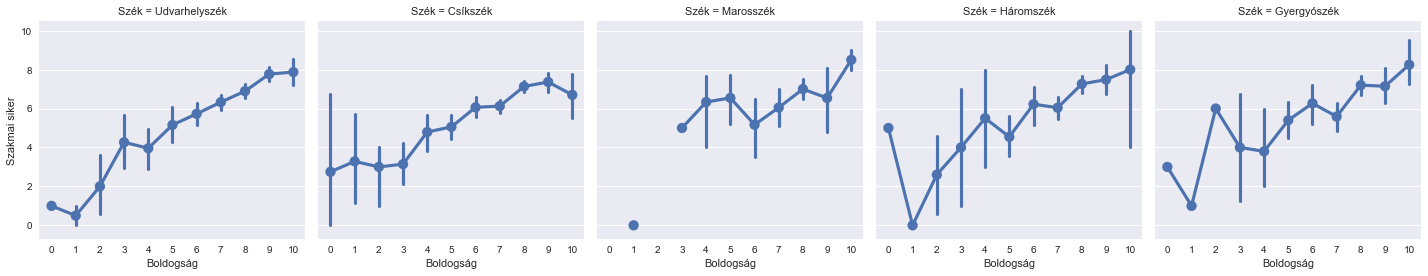

In [183]:
sns.factorplot(data=df, 
              ax = sns.violinplot(x="day", y="total_bill", data=tips) x='Boldogság',
               y='Szakmai siker',  
               col='Szék'
              )

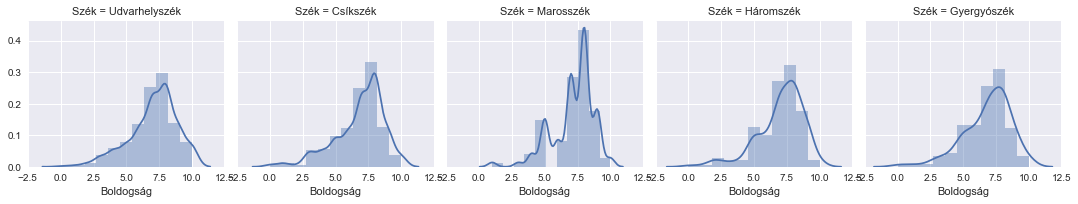

In [184]:
g = sns.FacetGrid(df, col='Szék') 
g.map(sns.distplot, 'Boldogság',bins=11)

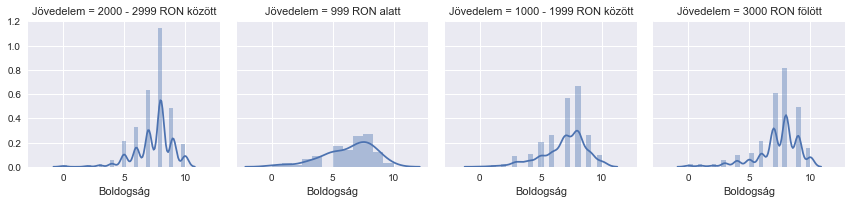

In [55]:
g = sns.FacetGrid(df, col='Jövedelem') 
g.map(sns.distplot, 'Boldogság')

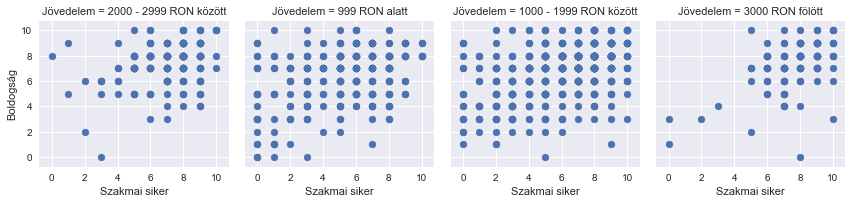

In [56]:
g = sns.FacetGrid(df, col='Jövedelem') 
g.map(plt.scatter,'Szakmai siker', 'Boldogság')

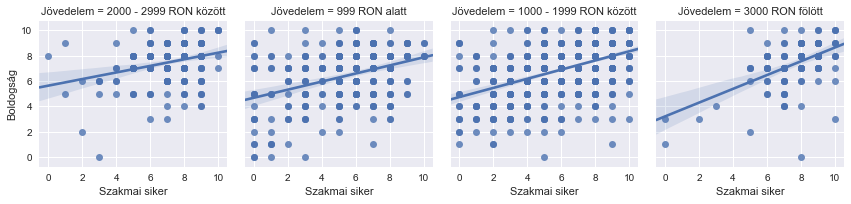

In [57]:
g = sns.FacetGrid(df, col='Jövedelem') 
g.map(sns.regplot,'Szakmai siker', 'Boldogság')

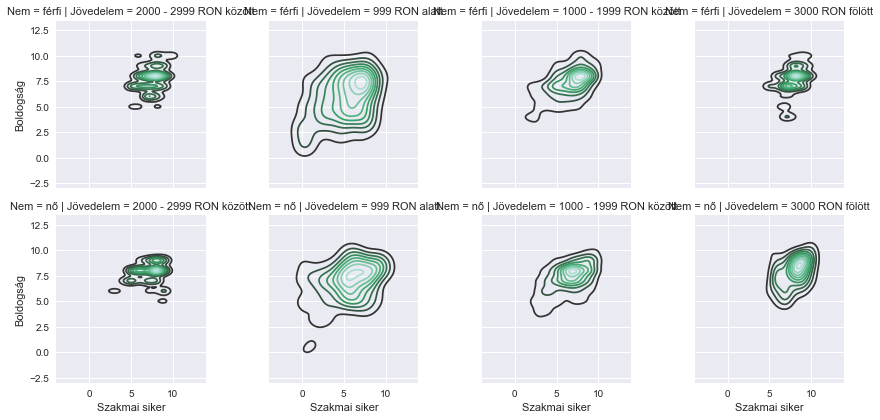

In [58]:
g = sns.FacetGrid(df, col='Jövedelem',row='Nem') 
g.map(sns.kdeplot,'Szakmai siker', 'Boldogság')

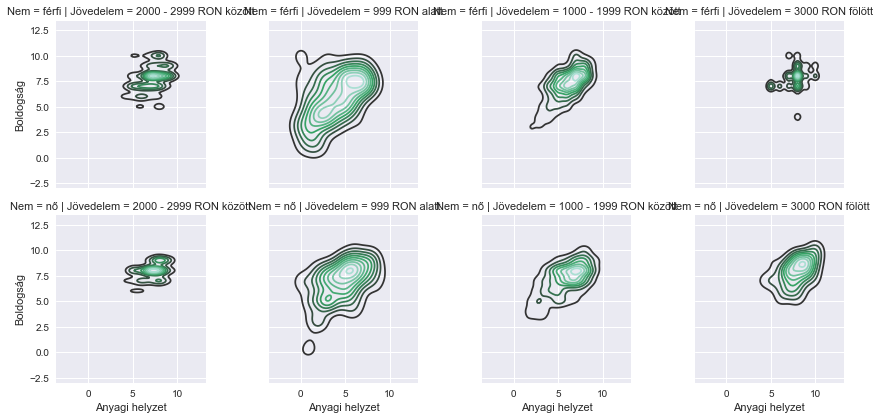

In [62]:
g = sns.FacetGrid(df, col='Jövedelem',row='Nem') 
g.map(sns.kdeplot,'Anyagi helyzet', 'Boldogság')

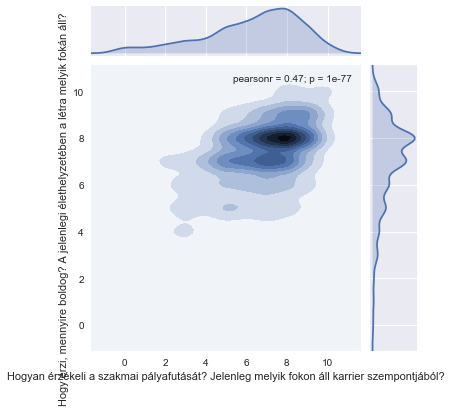

In [32]:
sns.jointplot('Hogyan érzékeli a szakmai pályafutását? Jelenleg melyik fokon áll karrier szempontjából?', 'Hogy érzi, mennyire boldog? A jelenlegi élethelyzetében a létra melyik fokán áll?', data=df, kind='kde')

In [33]:
df.columns

Index(['Sorszám', 'Neme?', 'Életkora', 'Városban lakik?',
       'A legmagasabb iskolai végzettsége', 'Hányan élnek egy háztartásban?',
       'Hogy érzi, mennyire boldog? A jelenlegi élethelyzetében a létra melyik fokán áll?',
       'Hogyan érzékeli a szakmai pályafutását? Jelenleg melyik fokon áll karrier szempontjából?',
       'Hogyan érzékeli az egészségi állapotát? Jelenleg  melyik fokon áll egészségileg?',
       'Milyeneknek érzi a baráti kapcsolatait? Jelenleg  melyik fokon áll az emberi kapcsolatokban?',
       'Milyennek érzékeli a természeti környezetet, amely körülveszi? Jelenleg  melyik fokon áll a környezetével kapcsolatokban?',
       'Megfelelő kikapcsolódási és szórakozási lehetőségei vannak? Jelenleg  melyik fokon áll a kikapcsolódás és szórakozás terén?',
       'Vallásos-e ön?',
       'Hogyan látja a jövőt? A boldogságát tekintve melyik fokon fog állni 5 év múlva?',
       'Hogyan érzékeli az anyagi helyzetét? Jelenleg  melyik fokon áll anyagilag?',
       'Milye

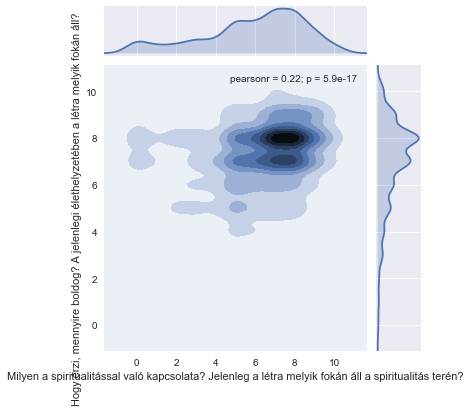

In [35]:
sns.jointplot('Milyen a spiritualitással való kapcsolata? Jelenleg a létra melyik fokán áll a spiritualitás terén?', 'Hogy érzi, mennyire boldog? A jelenlegi élethelyzetében a létra melyik fokán áll?', data=df, kind='kde')

In [245]:
c=[]
for j in range(4):
    c.append([i for i in df.columns if cats[i]==j])

In [246]:
c[2]

['Boldogság',
 'Szakmai siker',
 'Egészség',
 'Barátok',
 'Természet',
 'Szórakozás',
 'Anyagi helyzet',
 'Családi helyzet',
 'Spiritualitás',
 'Kedély']

In [161]:
q1=['Boldogság',
 'Szakmai siker',
 'Egészség',
 'Természet']

In [162]:
q2=['Boldogság',
 'Barátok',
 'Anyagi helyzet',
 'Családi helyzet']

In [163]:
q3=['Boldogság',
 'Szórakozás',
 'Spiritualitás',
 'Kedély']

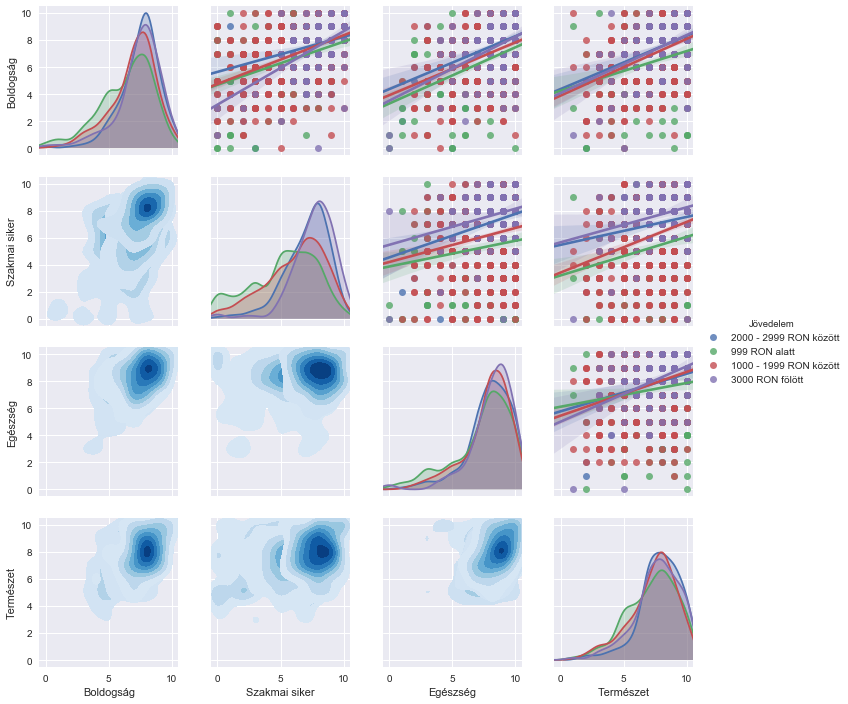

In [166]:
lg='Jövedelem'
g = sns.PairGrid(df[q1+[lg]],hue=lg)
g.map_diag(sns.kdeplot, shade=True, bw=0.6)
g.map_lower(sns.kdeplot, cmap='Blues', n_levels=8, shade=True, shade_lowest=False, bw=0.6);
g.map_upper(sns.regplot);
g.set(ylim=(-0.5,10.5))
g.set(xlim=(-0.5,10.5))
g = g.add_legend()

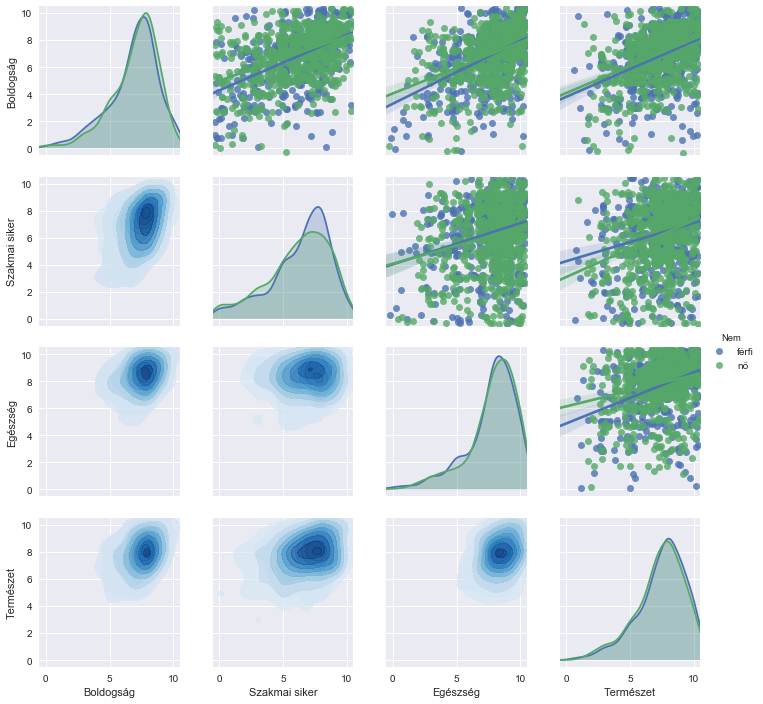

In [175]:
lg='Nem'
al=0.7
g = sns.PairGrid(df[q1+[lg]],hue=lg)
g.map_diag(sns.kdeplot, shade=True, bw=0.6)
g.map_lower(sns.kdeplot, cmap='Blues', n_levels=8, shade=True, shade_lowest=False, bw=0.6,alpha=al);
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4);
g.set(ylim=(-0.5,10.5))
g.set(xlim=(-0.5,10.5))
g = g.add_legend()

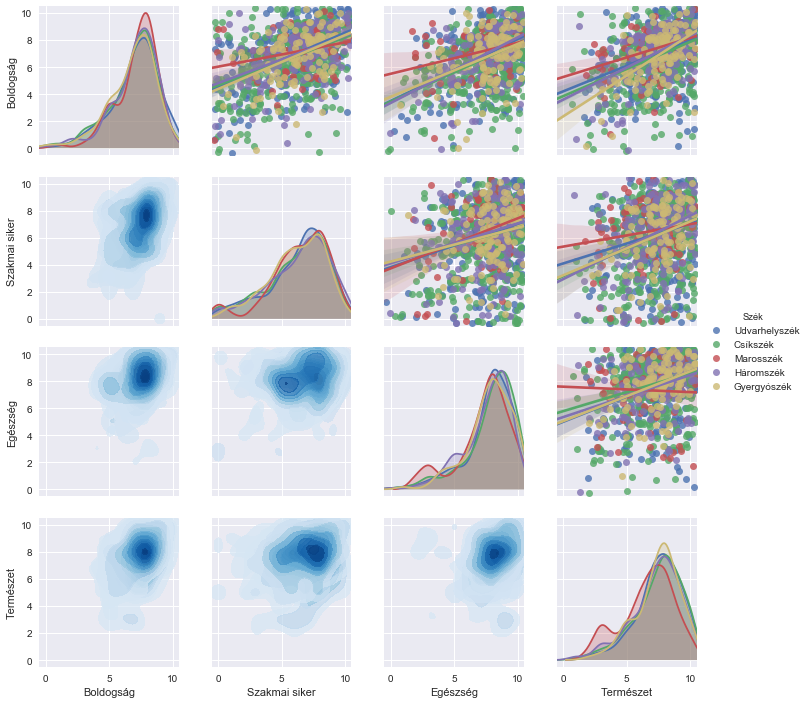

In [185]:
lg='Szék'
al=0.7
g = sns.PairGrid(df[q1+[lg]],hue=lg)
g.map_diag(sns.kdeplot, shade=True, bw=0.6)
g.map_lower(sns.kdeplot, cmap='Blues', n_levels=8, shade=True, shade_lowest=False, bw=0.6,alpha=al);
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4);
g.set(ylim=(-0.5,10.5))
g.set(xlim=(-0.5,10.5))
g = g.add_legend()

(-0.5, 10.5)

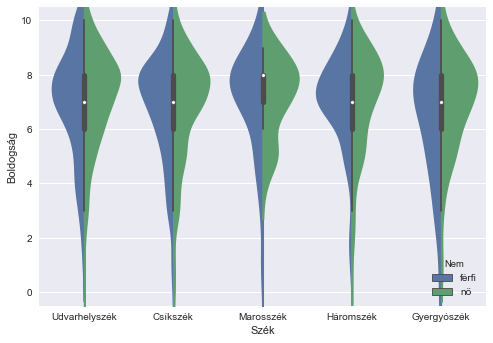

In [192]:
ax = sns.violinplot(x=lg, y="Boldogság", data=df,hue='Nem', split=True)
ax.set_ylim(-0.5,10.5)

(-0.5, 10.5)

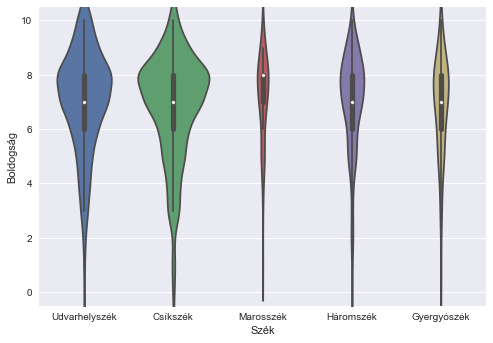

In [200]:
ax = sns.violinplot(x=lg, y="Boldogság", data=df,scale="count")
ax.set_ylim(-0.5,10.5)

(-0.5, 10.5)

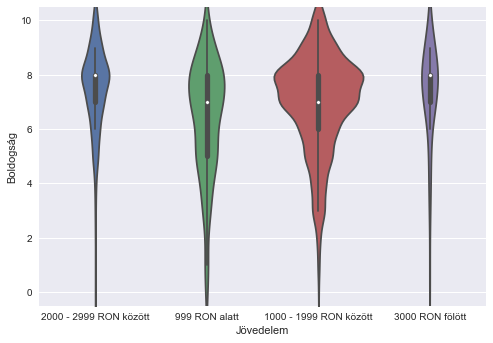

In [199]:
ax = sns.violinplot(x='Jövedelem', y="Boldogság", data=df,scale="count")
ax.set_ylim(-0.5,10.5)

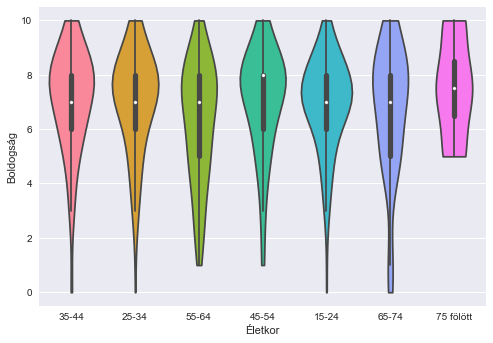

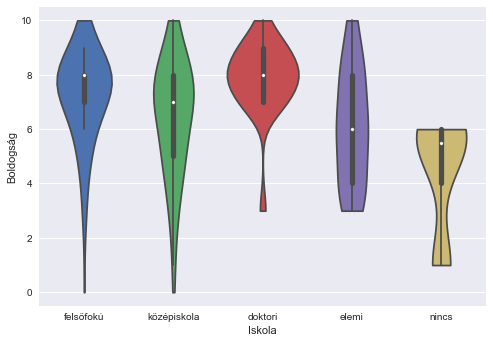

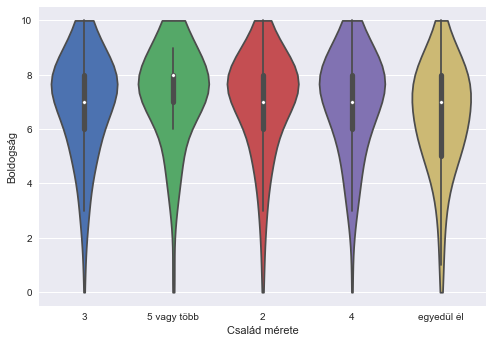

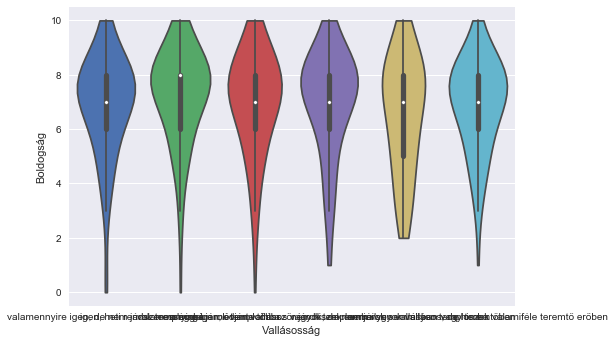

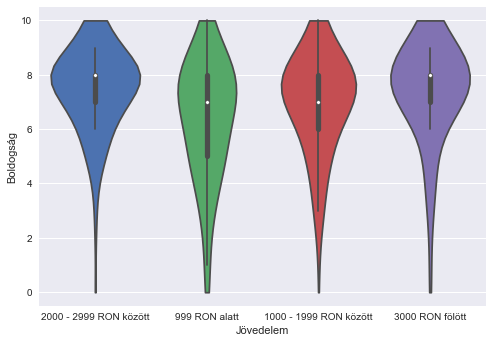

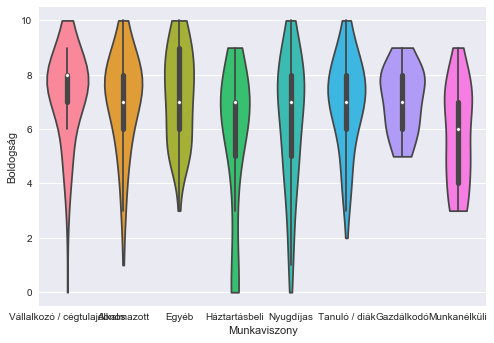

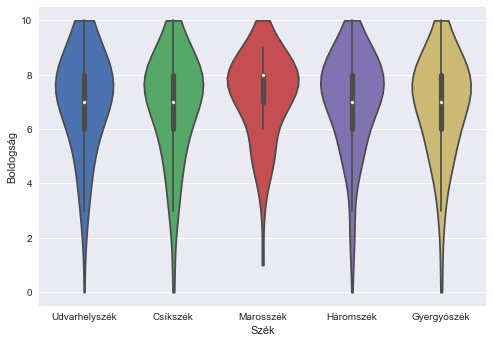

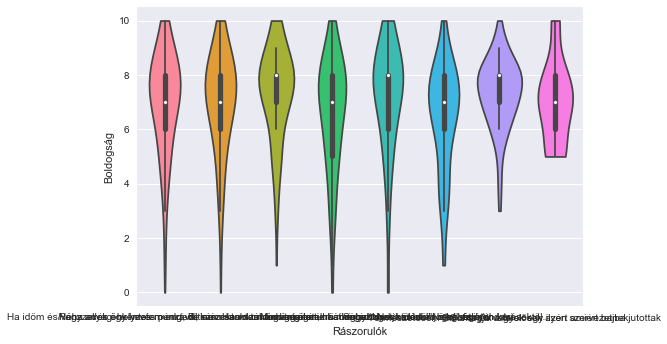

In [247]:
for myx in c[1][1:]:
    plt.figure()
    #ax = sns.violinplot(x=myx, y="Boldogság", data=df,cut=1,saturation=0,gridsize=31,bw=0.5)
    ax = sns.violinplot(x=myx, y="Boldogság", data=df,#scale="count",
                        saturation=1,cut=0,gridsize=31,bw=0.5)
    ax.set_ylim(-0.5,10.5)

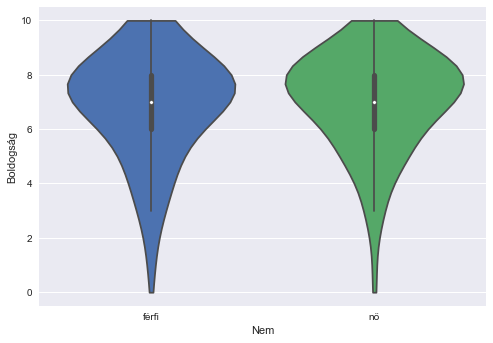

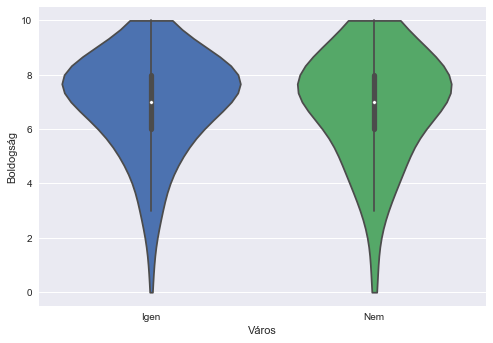

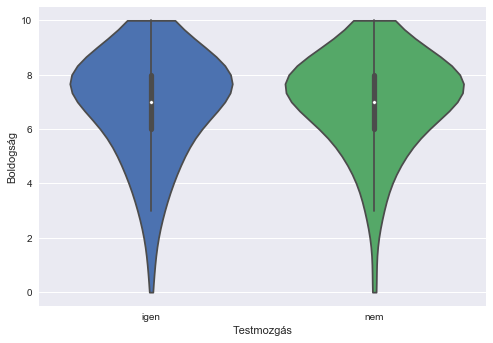

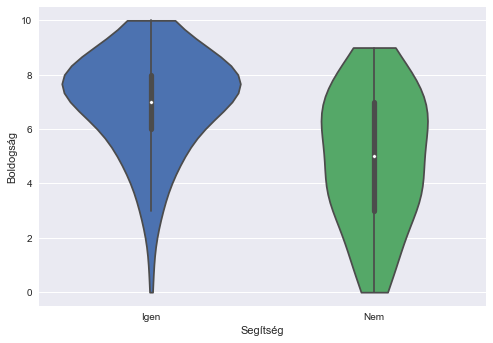

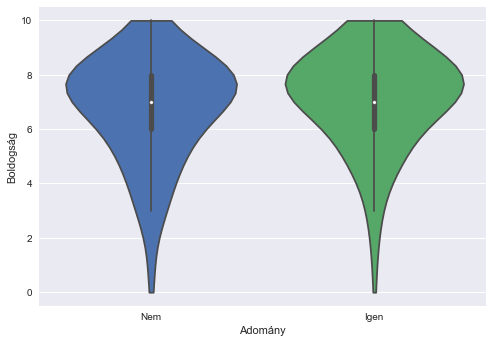

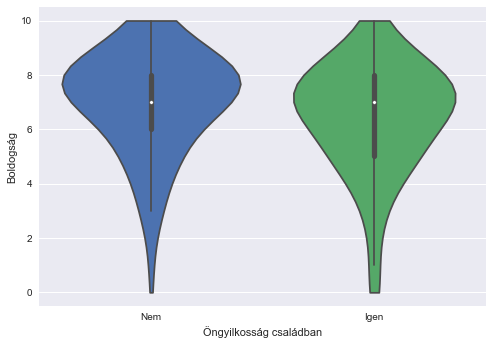

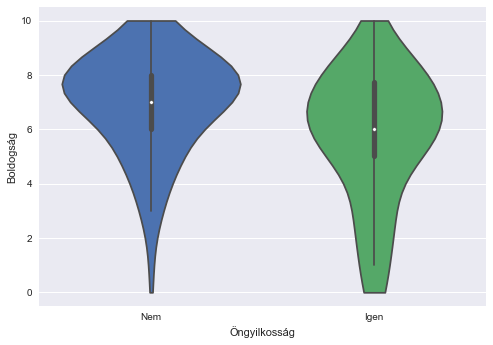

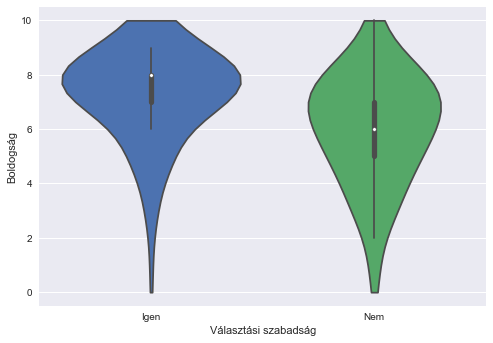

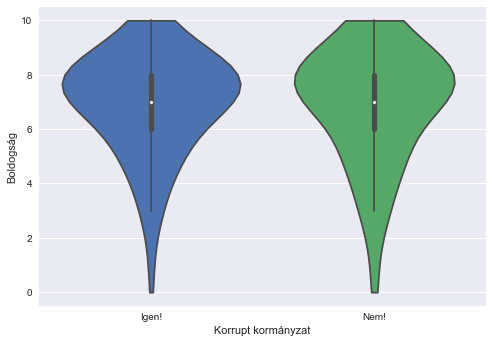

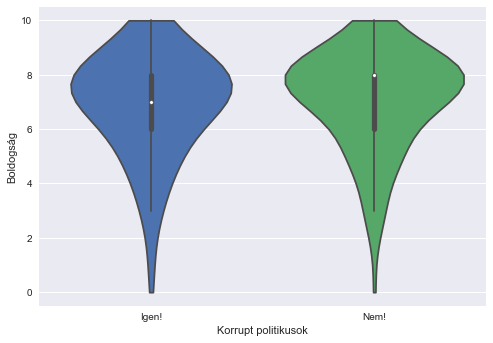

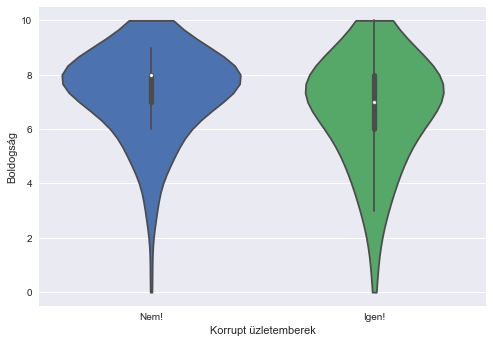

In [249]:
for myx in c[0][:]:
    plt.figure()
    #ax = sns.violinplot(x=myx, y="Boldogság", data=df,cut=1,saturation=0,gridsize=31,bw=0.5)
    ax = sns.violinplot(x=myx, y="Boldogság", data=df,#scale="count",
                        saturation=1,cut=0,gridsize=31,bw=0.5)
    ax.set_ylim(-0.5,10.5)

C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


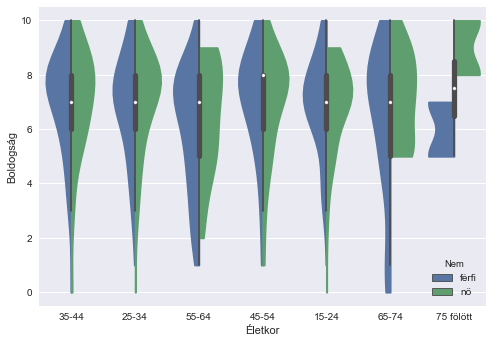

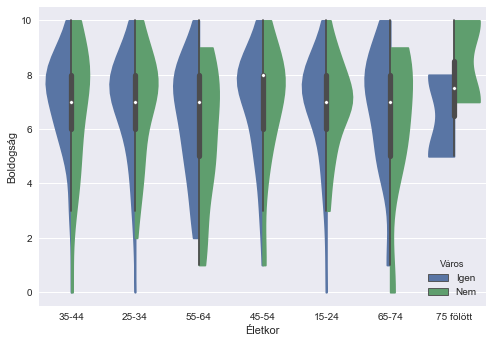

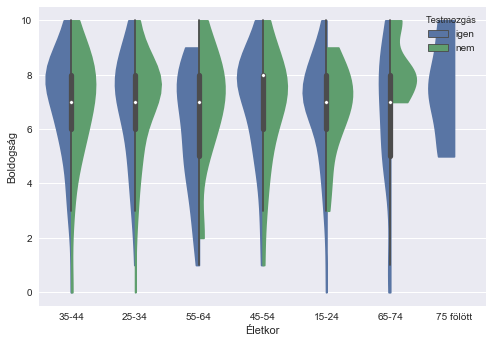

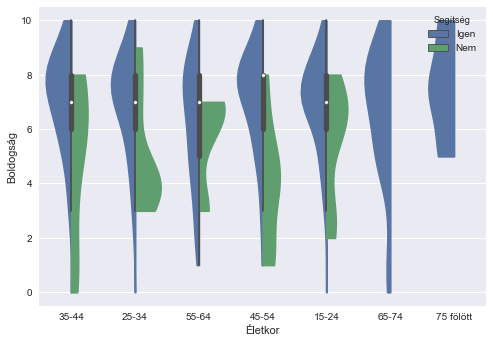

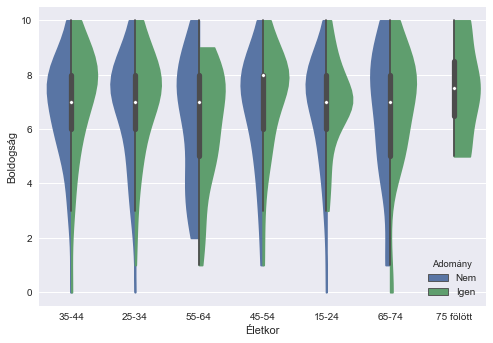

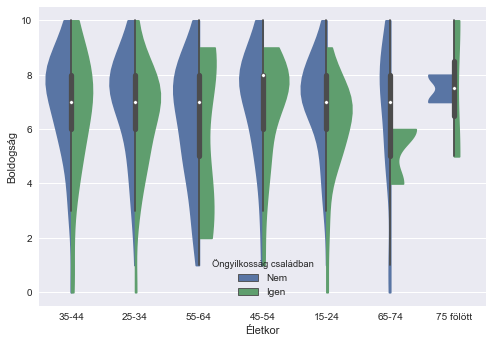

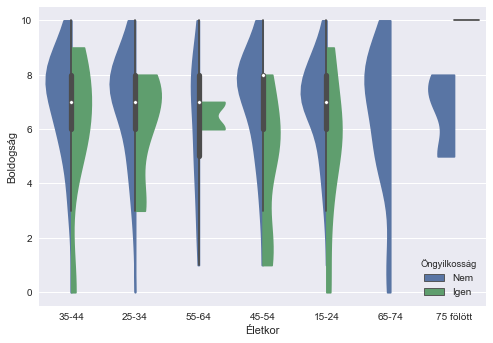

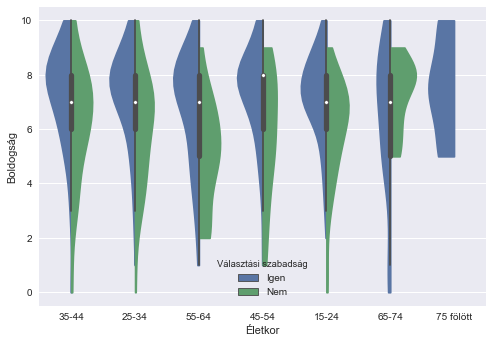

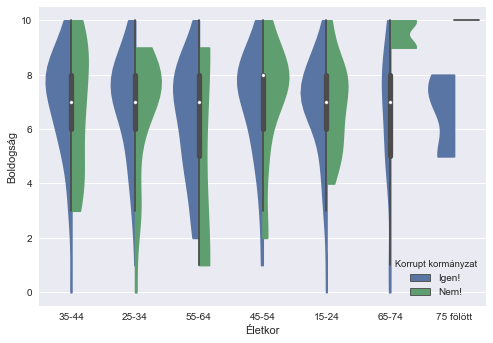

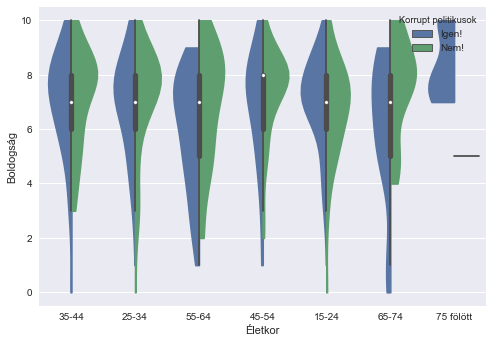

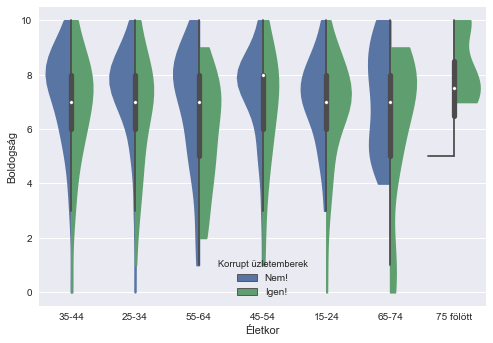

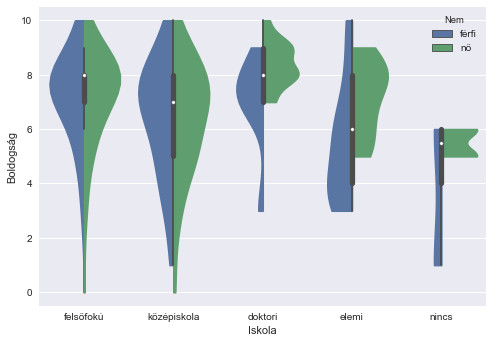

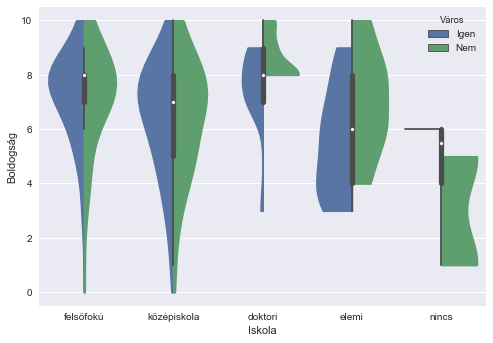

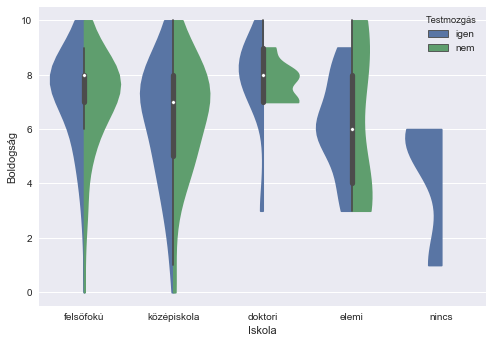

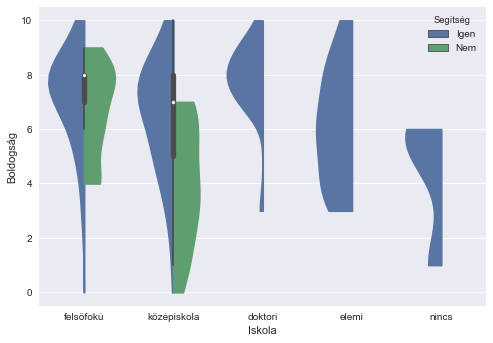

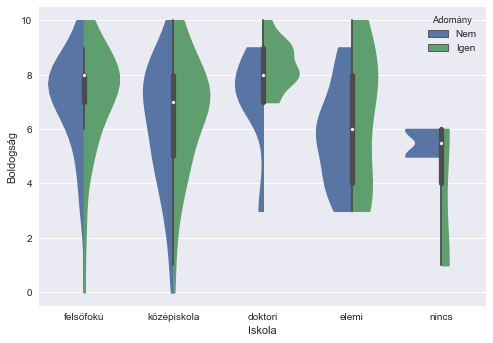

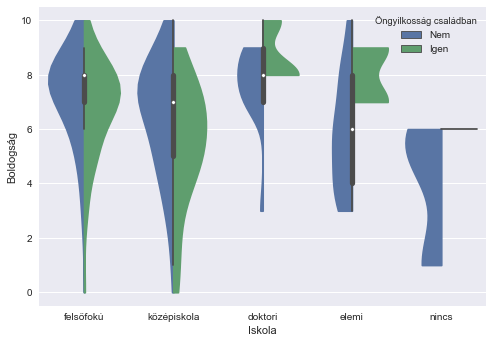

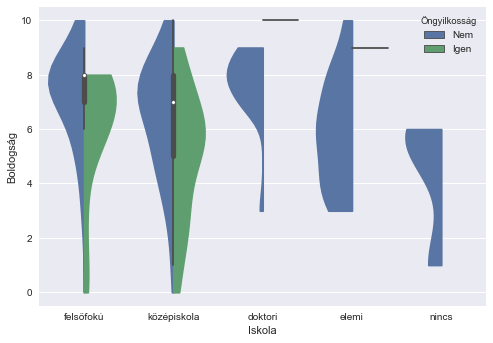

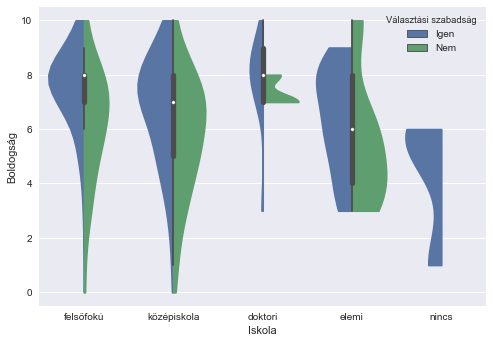

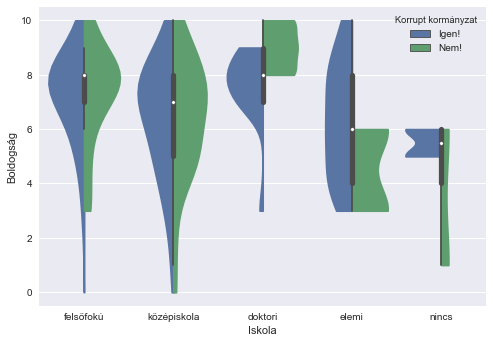

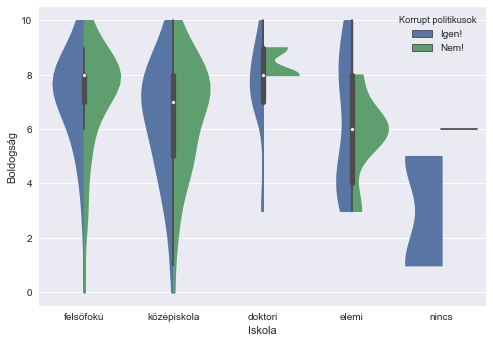

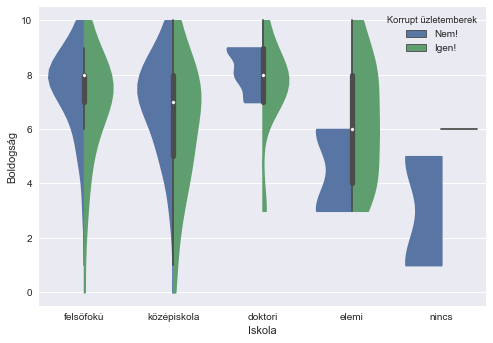

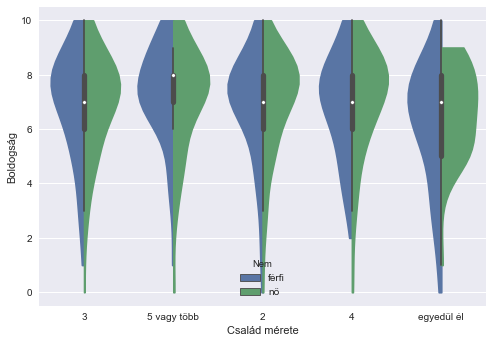

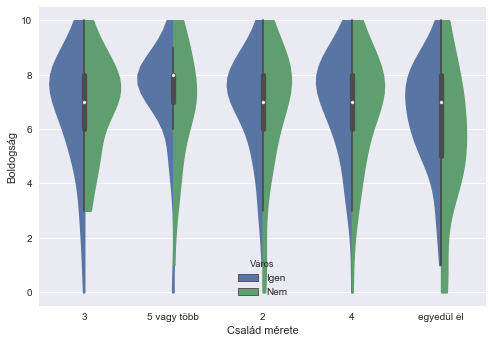

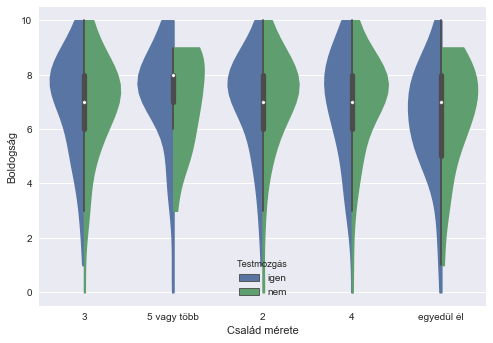

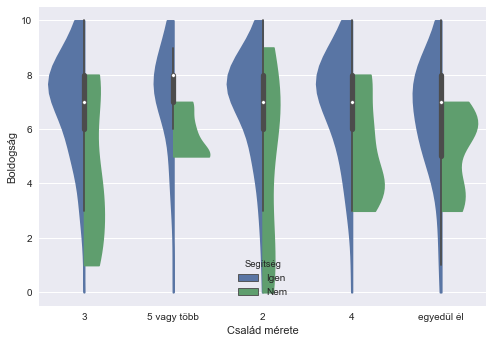

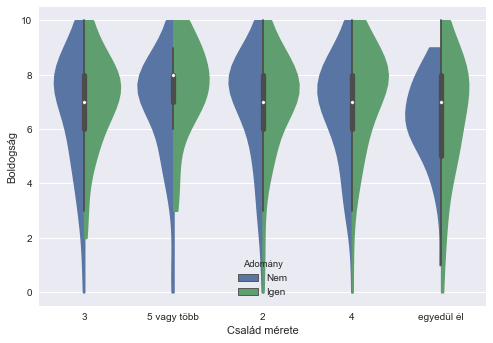

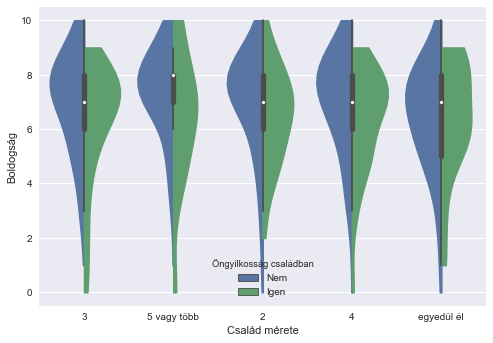

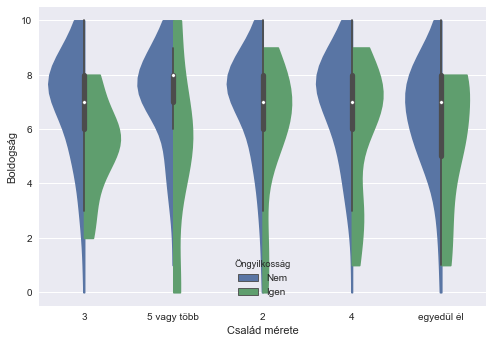

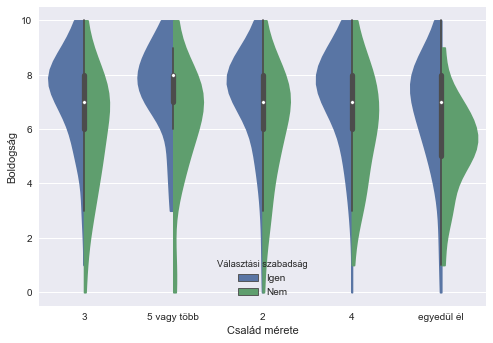

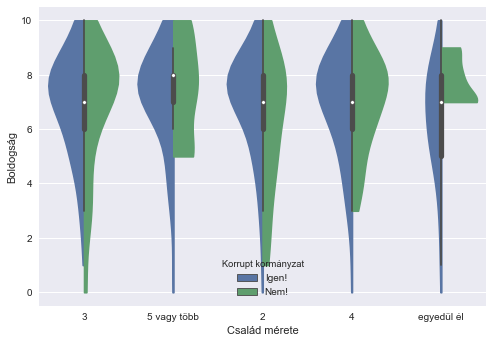

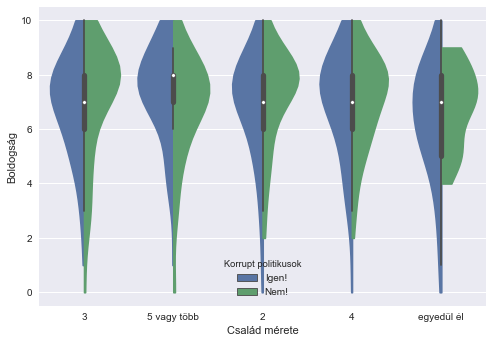

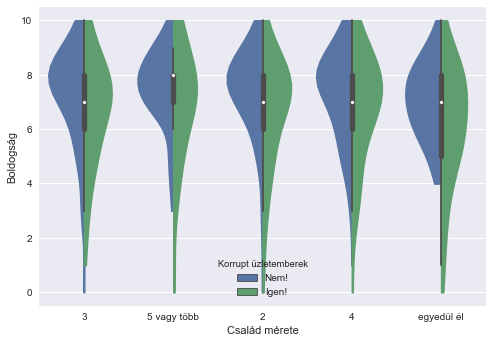

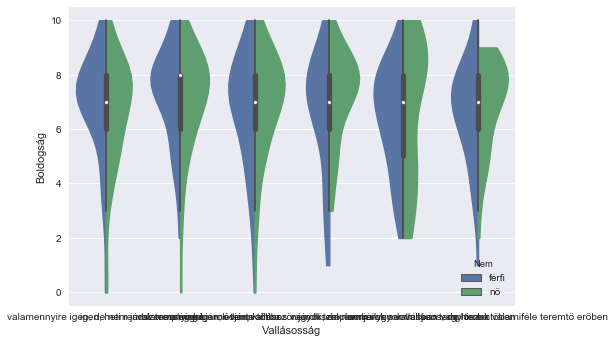

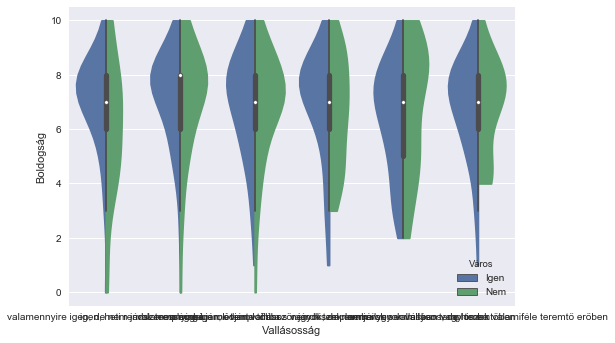

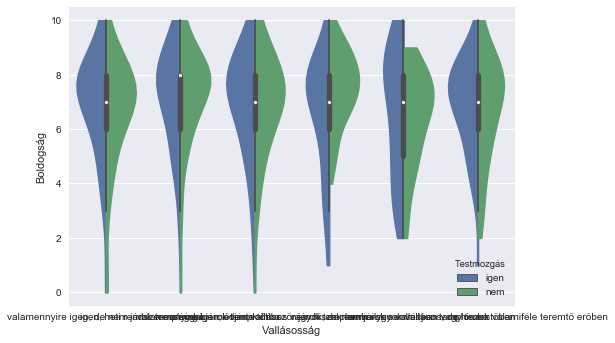

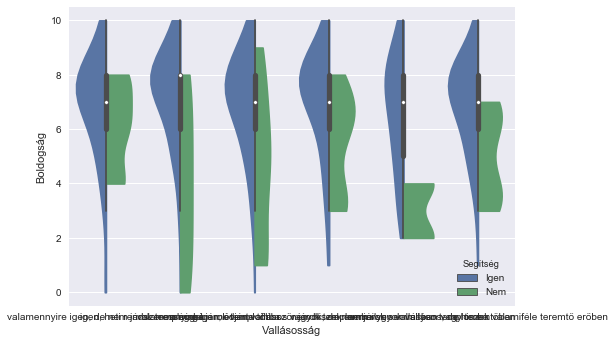

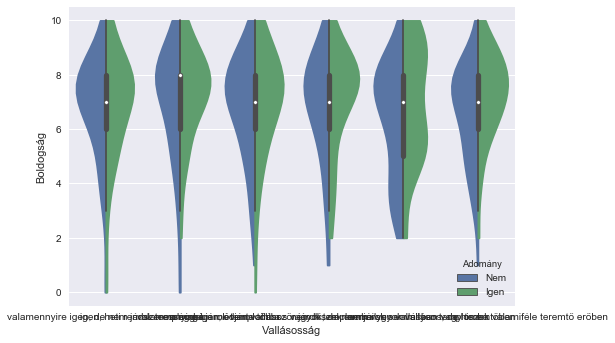

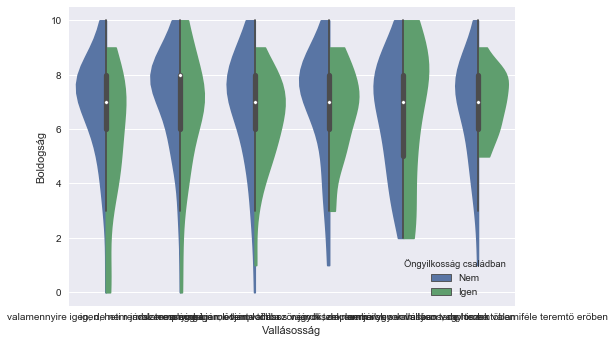

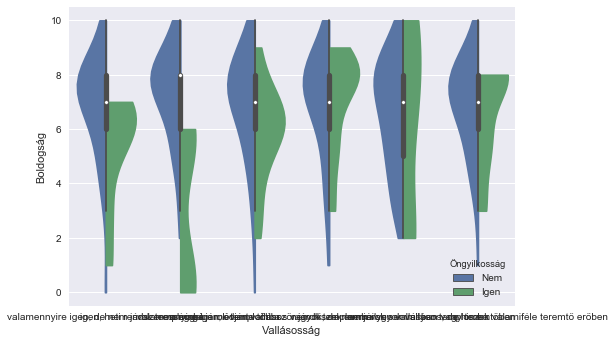

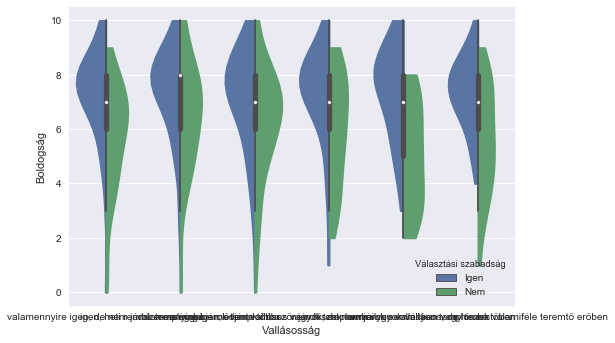

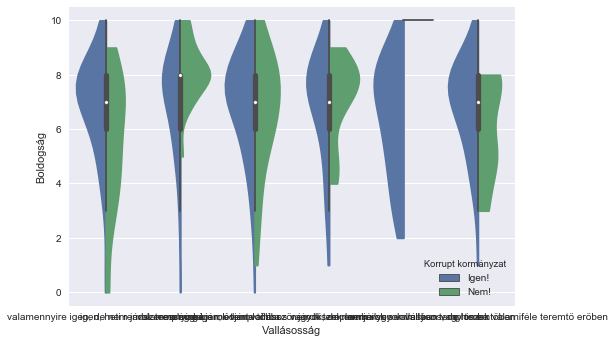

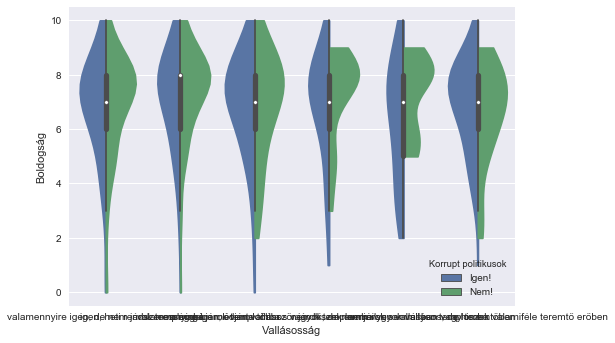

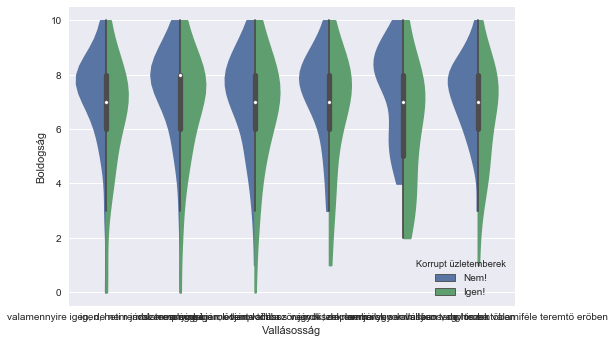

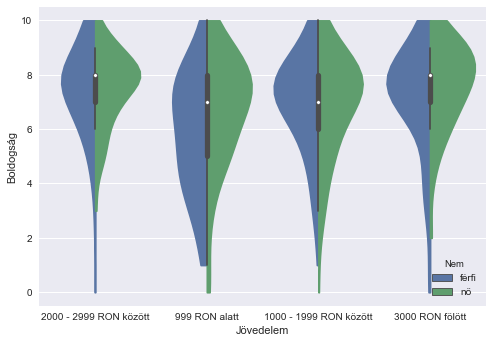

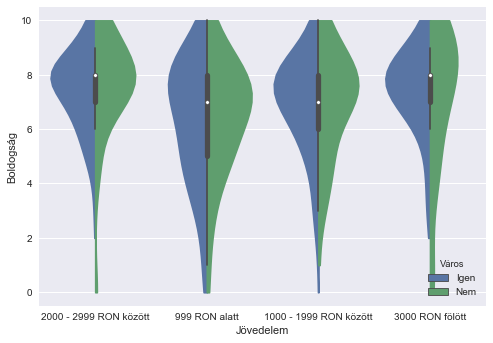

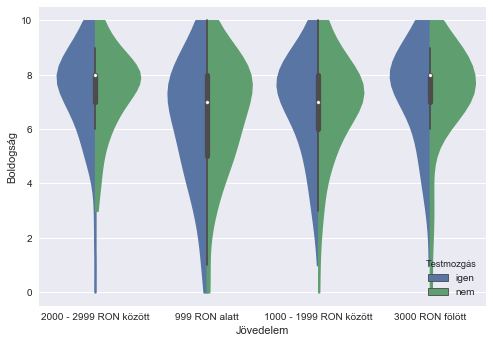

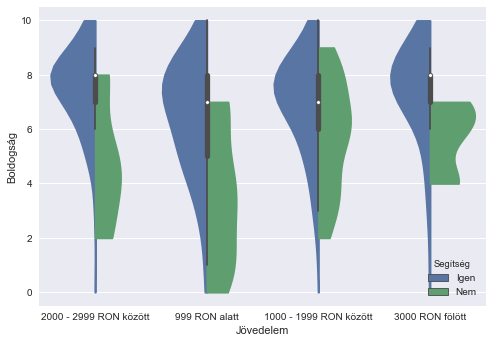

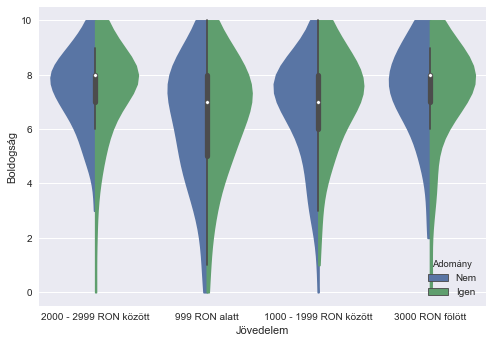

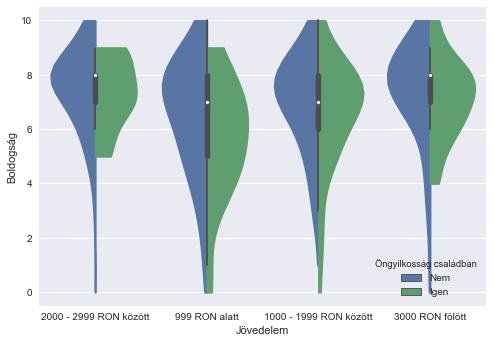

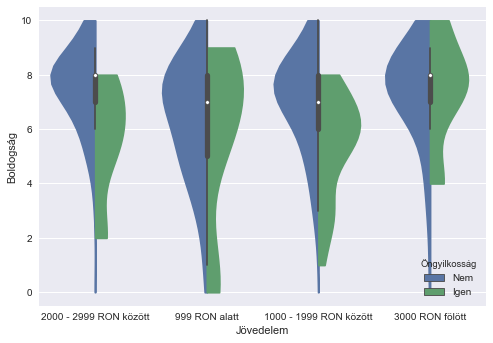

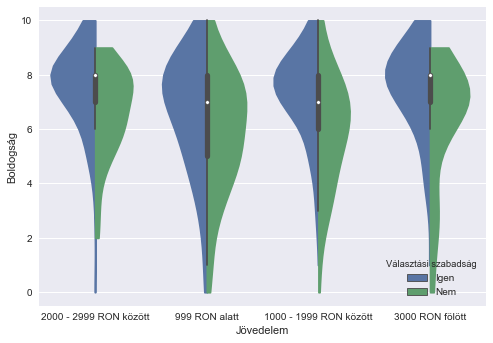

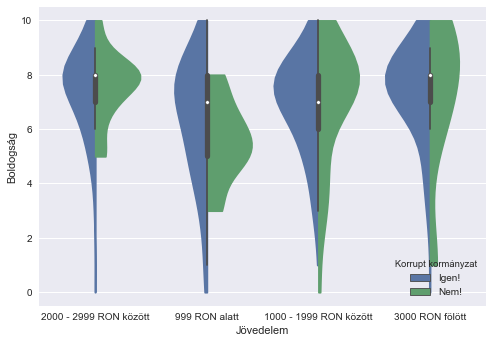

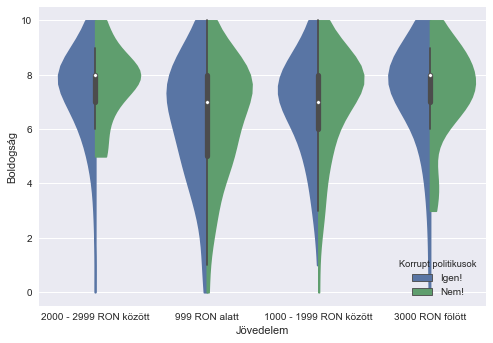

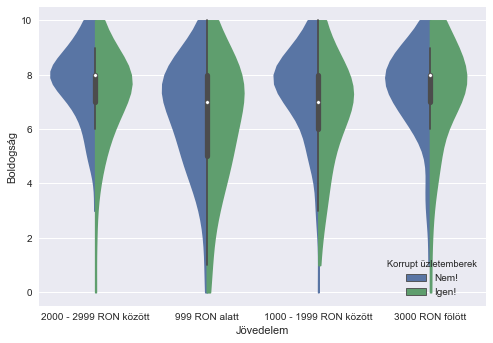

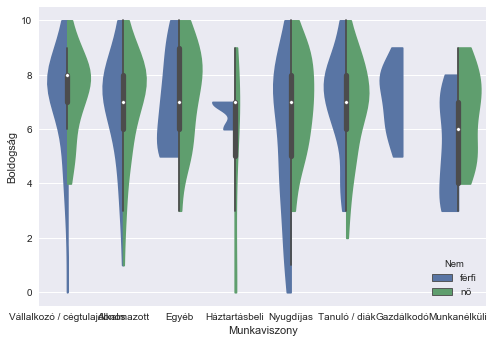

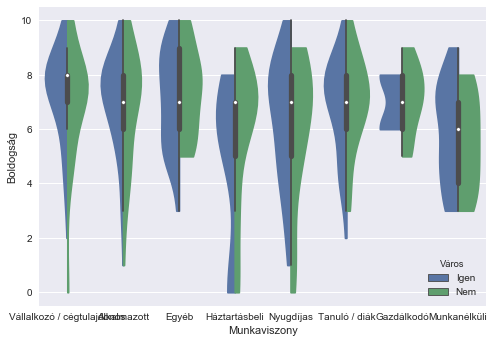

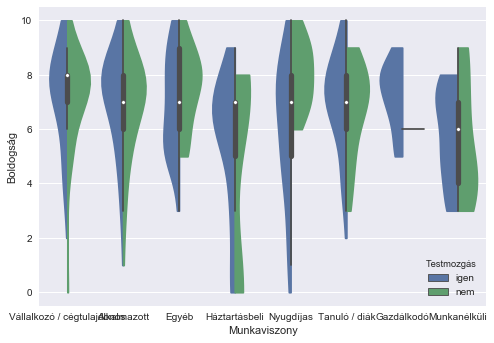

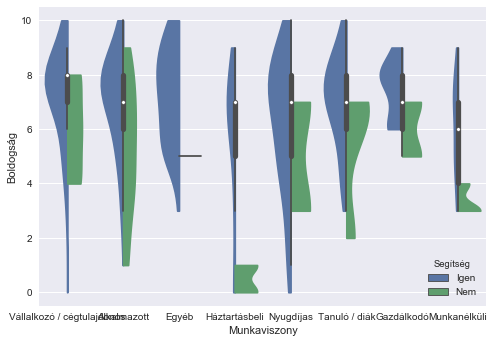

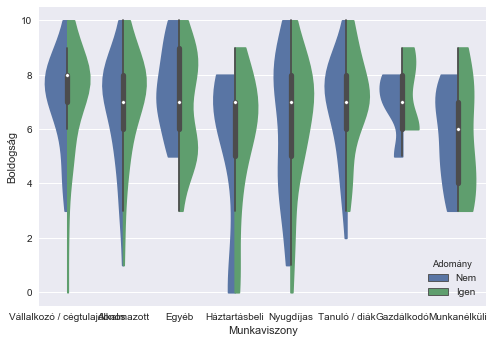

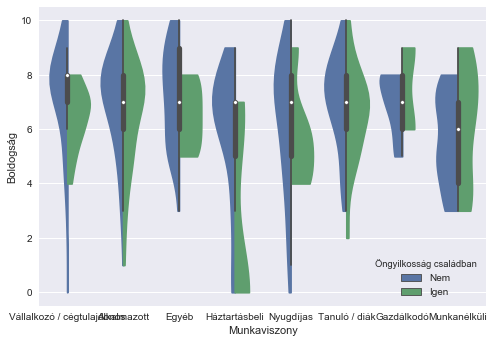

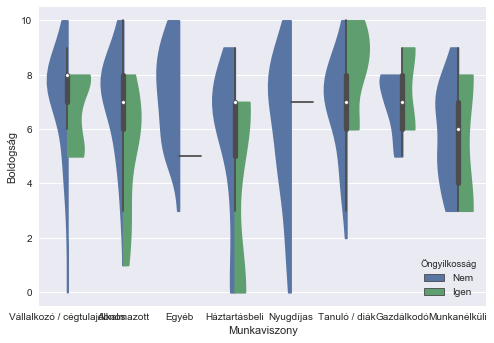

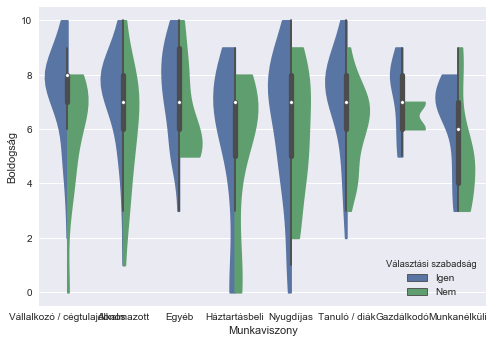

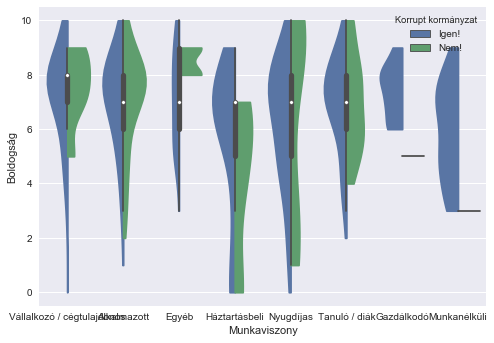

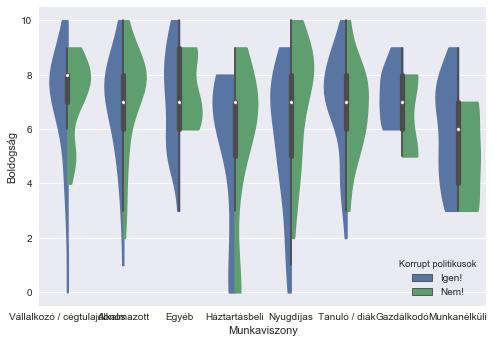

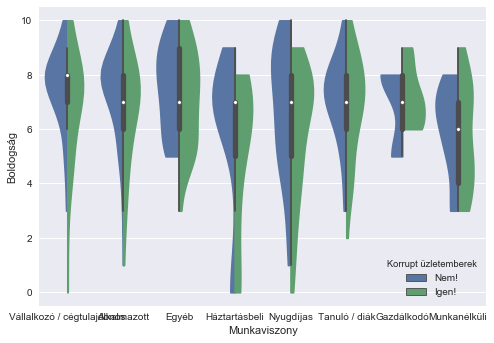

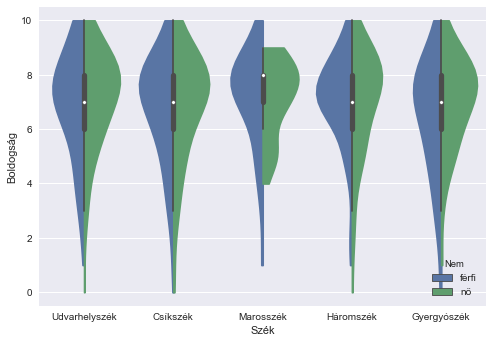

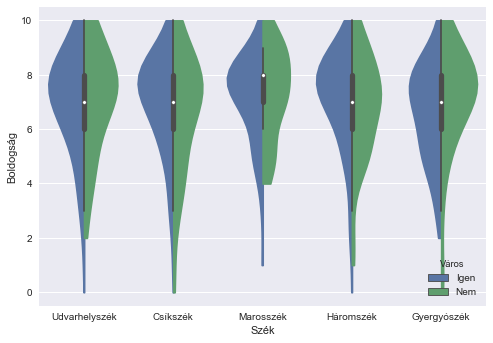

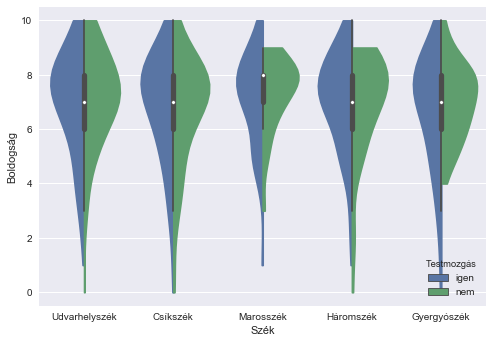

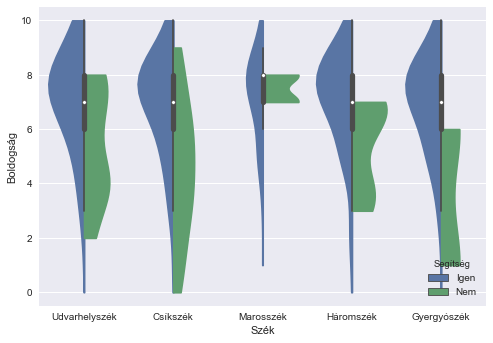

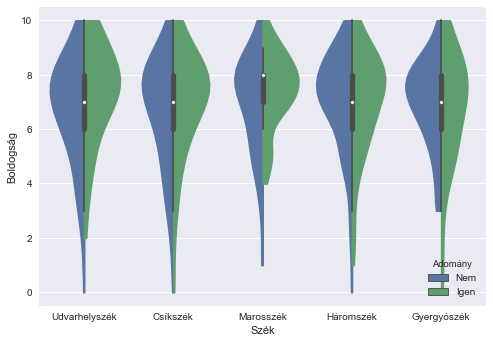

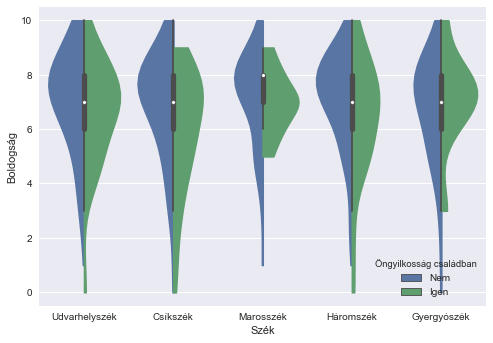

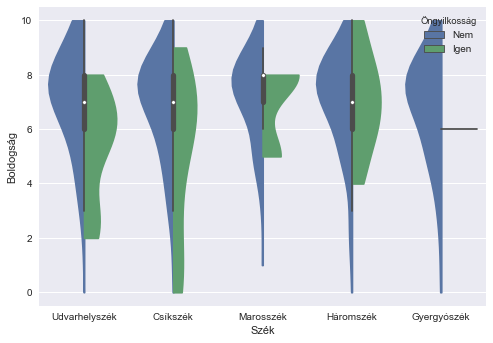

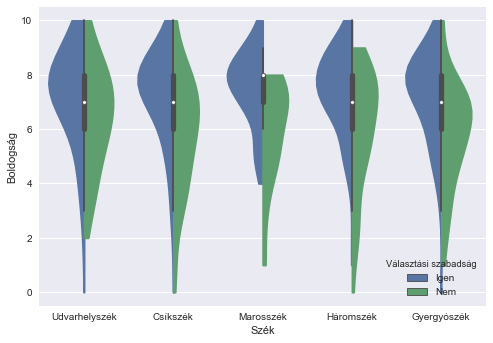

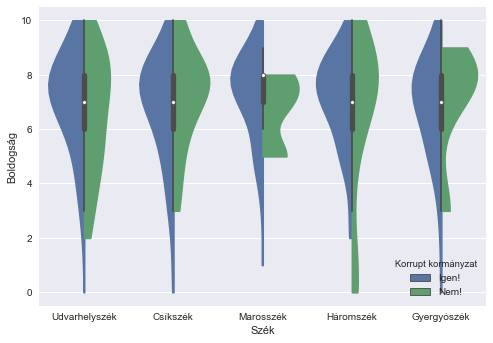

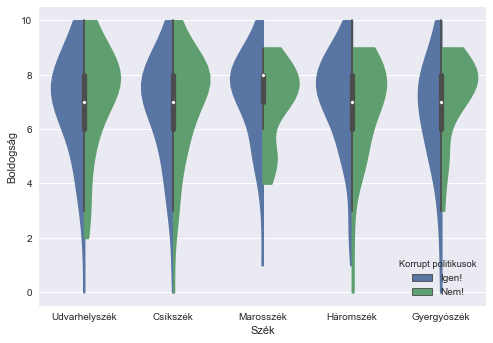

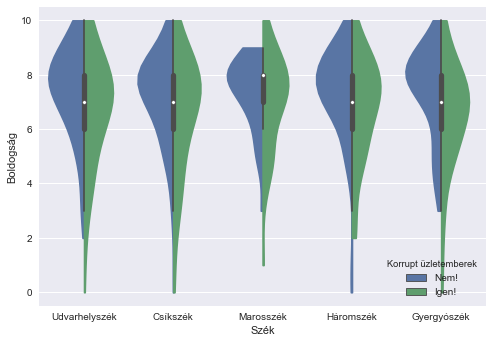

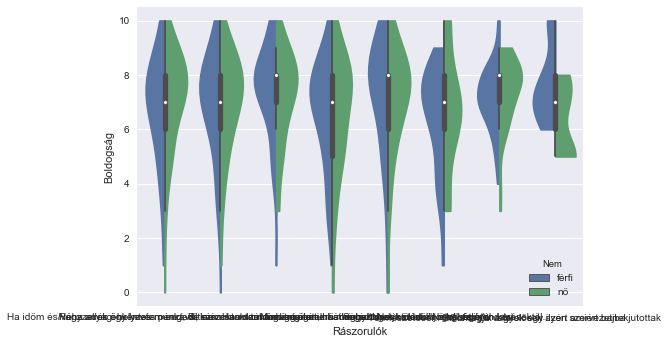

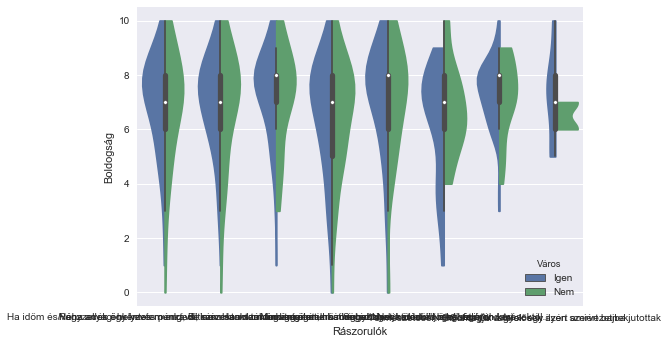

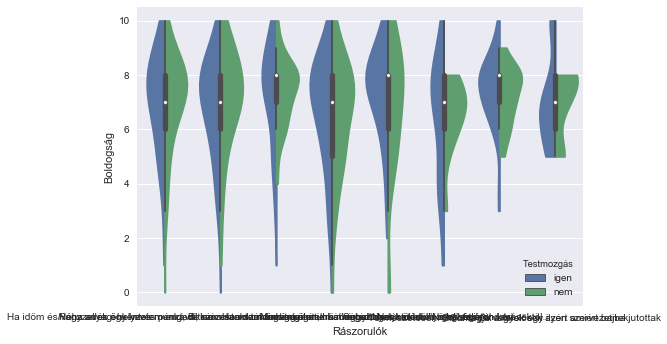

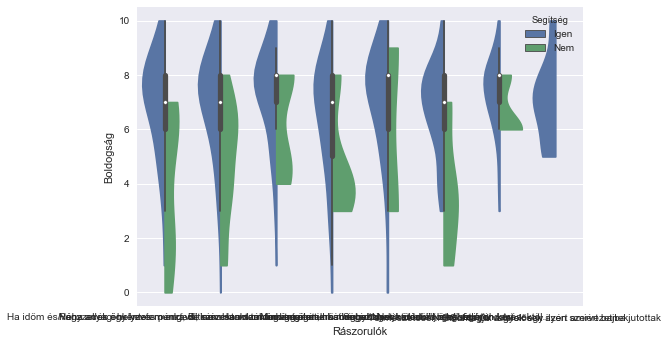

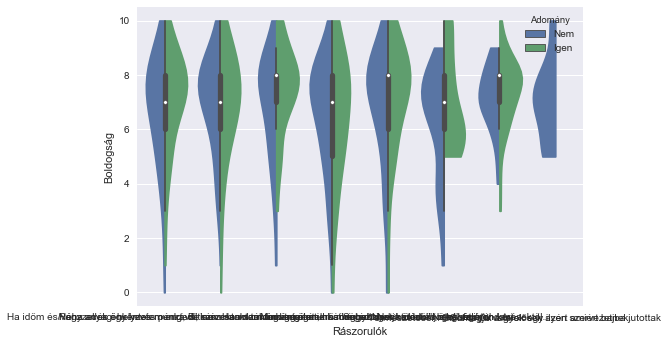

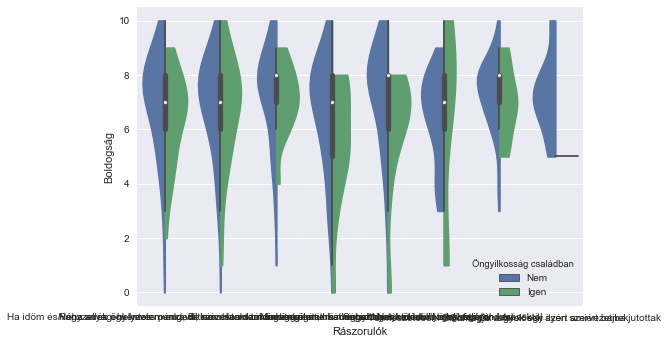

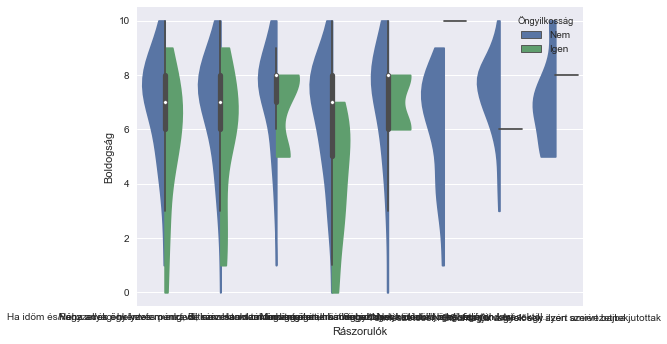

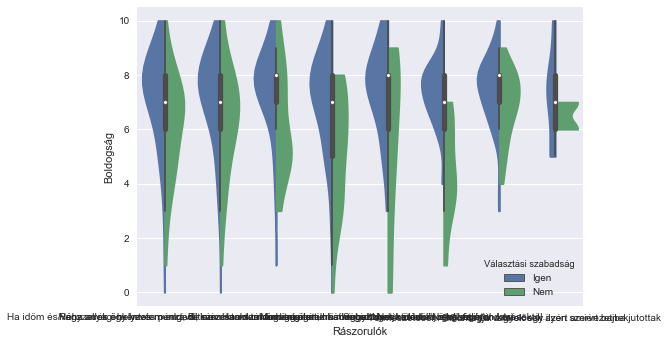

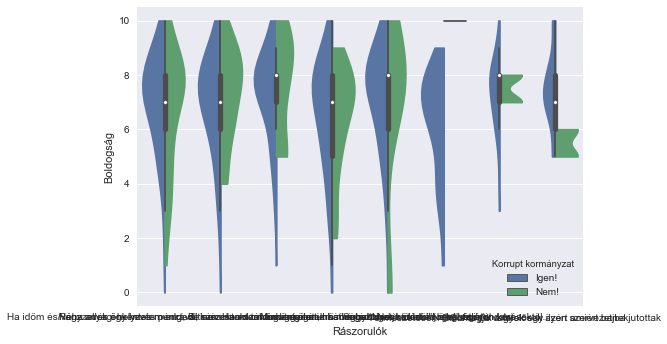

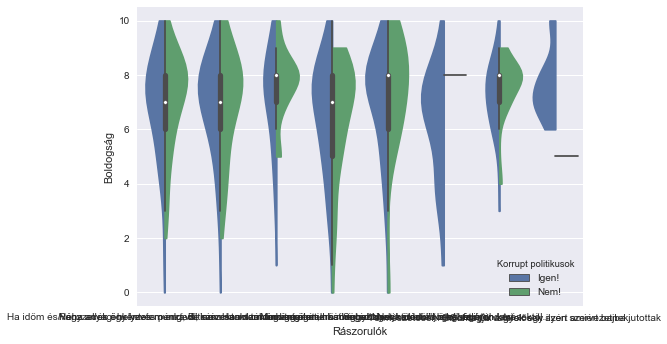

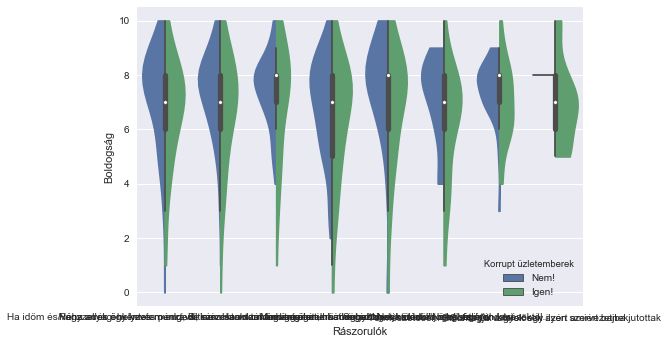

In [248]:
for myx in c[1][1:]:
    for myy in c[0][:]:
        plt.figure()
        #ax = sns.violinplot(x=myx, y="Boldogság", data=df,cut=1,saturation=0,gridsize=31,bw=0.5)
        ax = sns.violinplot(x=myx, y="Boldogság", data=df,#scale="count",
                            hue=myy,split=True,cut=0,gridsize=31,bw=0.5)
        ax.set_ylim(-0.5,10.5)

C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


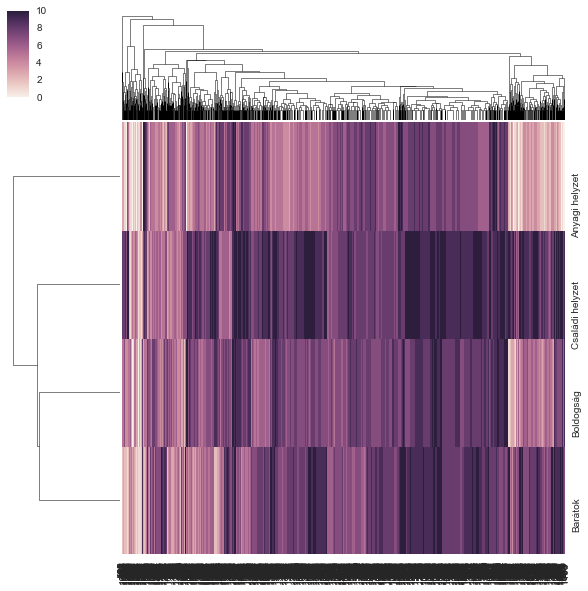

In [255]:
sns.clustermap(df[q2].T)

C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


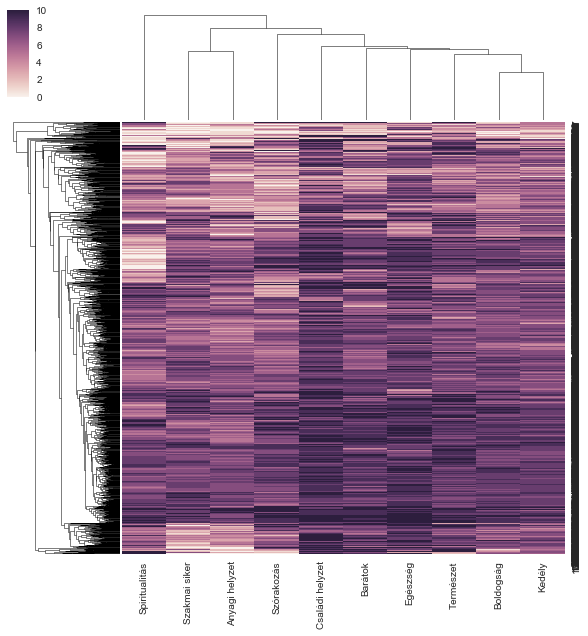

In [258]:
sns.clustermap(df[c[2]])

C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


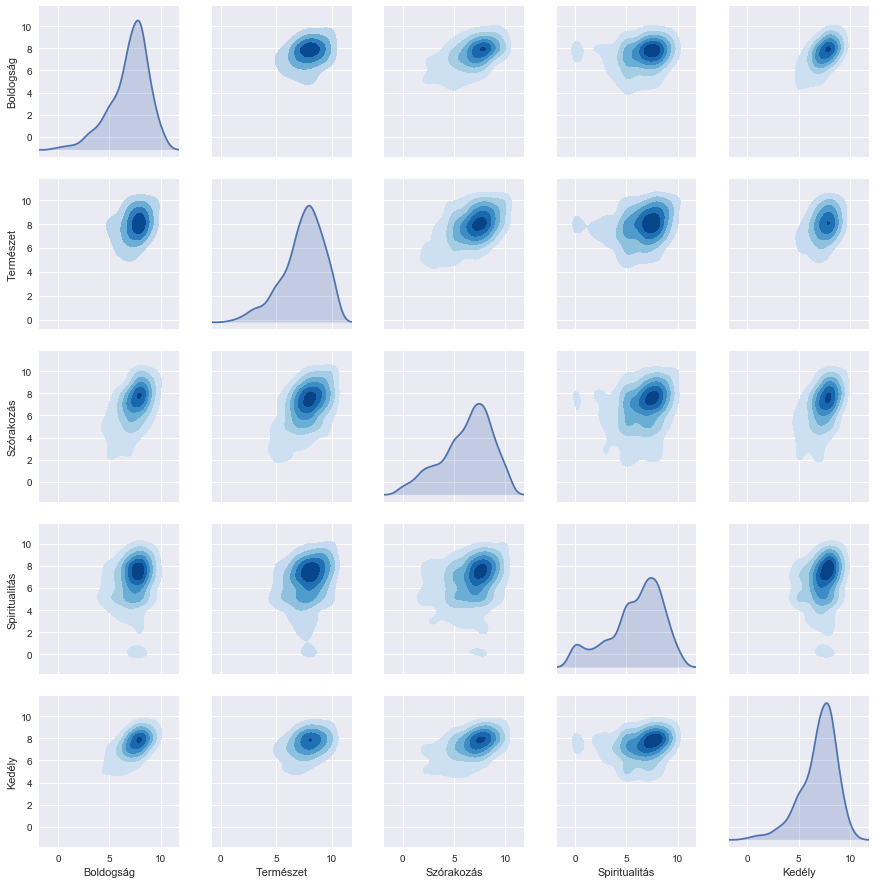

In [147]:
g = sns.PairGrid(df[q2])
g.map_diag(sns.kdeplot, shade=True, bw=0.6)
g.map_offdiag(sns.kdeplot, cmap="Blues", n_levels=6, shade=True, shade_lowest=False, bw=0.6);
g.set(ylim=(0,10))
g.set(xlim=(0,10))

In [142]:
colors=['Blues','Reds','Greens','Oranges','Purples','Greys']

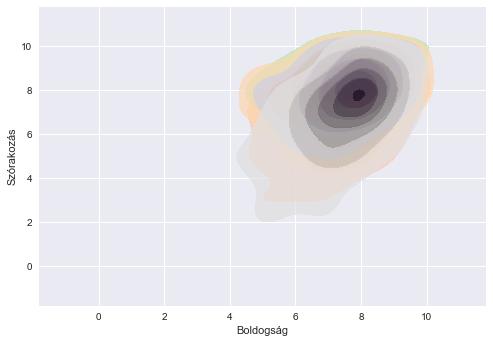

In [143]:
for ii in range(len(c[2][:6])):
    i=c[2][ii]
    if i not in ['Boldogság']:
        sns.kdeplot(df['Boldogság'],df[i],
                       cmap=colors[ii], n_levels=6, shade=True, shade_lowest=False, 
                       bw=0.6,alpha=0.7)
